## 1. Breath alcohol tests in Ames, Iowa, USA
<p>The columns in this data set are year, month, day, hour, location, gender, Res1, Res2.</p>

In [ ]:
import pandas as pd

# Load the data
ba_data = pd.read_csv('breath_alcohol_ames.csv')

# Display the first 5 rows of the DataFrame
display(ba_data.head())

,year,month,day,hour,location,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


## 2. What is the busiest police department in Ames?
<p>There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyzer tests? </p>

In [ ]:
ba_data['location'].value_counts()

,count
location,
ISU PD,940
Ames PD,616


Text(0, 0.5, 'Number of Tests')

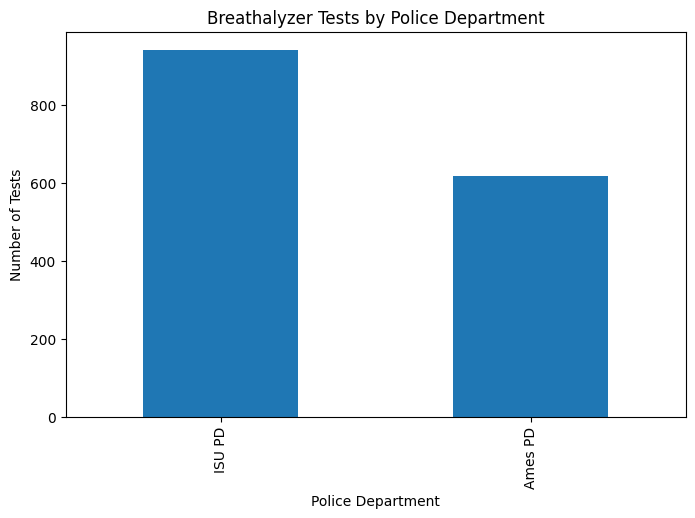

In [ ]:
plt.figure(figsize=(8, 5))
ba_data['location'].value_counts().plot(kind='bar')
plt.title('Breathalyzer Tests by Police Department')
plt.xlabel('Police Department')
plt.ylabel('Number of Tests')

## 3. Nothing Good Happens after 2am
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/himym02.jpg" style="float: left;margin:5px 20px 5px 1px;width:300px"></p>
<p>We all know that "nothing good happens after 2am." Thus, there are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyzer tests?  </p>

In [ ]:
ba_data['hour'].value_counts()

,count
hour,
2,417
3,364
1,219
4,124
0,98
23,51
5,48
20,31
22,29


Text(0, 0.5, 'Number of Tests')

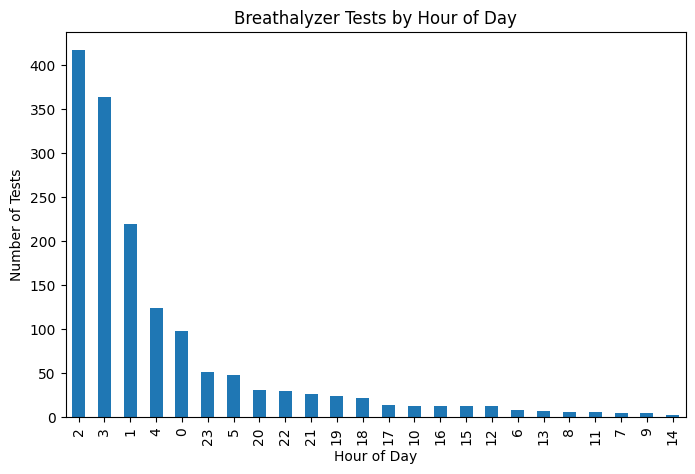

In [ ]:
plt.figure(figsize=(8, 5))
ba_data['hour'].value_counts().plot(kind='bar')
plt.title('Breathalyzer Tests by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tests')

## 4. Breathalyzer tests by month
<p>Now that we have discovered which time of day is most common for breath alcohol tests, we will determine which time of the year has the most breathalyzer tests. Which month will have the most recorded tests?</p>

In [ ]:
ba_data['month'].value_counts()

,count
month,
8,167
4,159
9,146
3,145
1,145
10,135
5,132
2,117
6,112


Text(0, 0.5, 'Number of Tests')

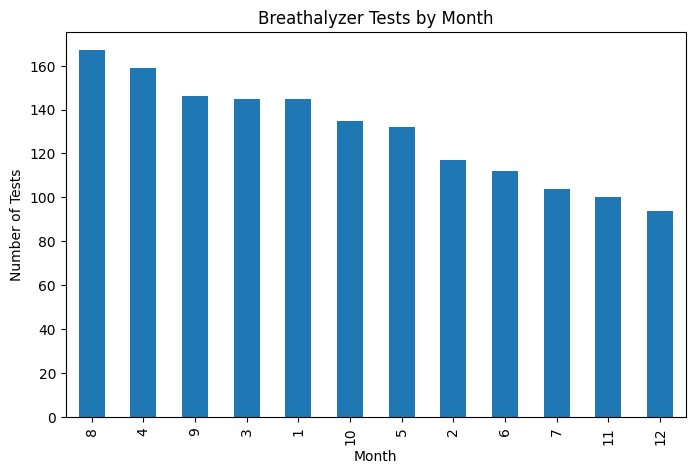

In [ ]:
plt.figure(figsize=(8, 5))
ba_data['month'].value_counts().plot(kind='bar')
plt.title('Breathalyzer Tests by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tests')

## 5. COLLEGE
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/PF2081John-Belushi-College-Posters.jpg" style="float: left;margin:5px 20px 5px 1px"> </p>
<p>When we think of (binge) drinking in college towns in America, we usually think of something like this image at the left. And so, one might suspect that breath alcohol tests are given to men more often than women and that men drink more than women. </p>

,count
gender,
M,1102
F,425


,Res1,Res2
gender,,
F,0.125014,0.124534
M,0.116411,0.115980


Text(0, 0.5, 'Average Result')

<Figure size 800x500 with 0 Axes>

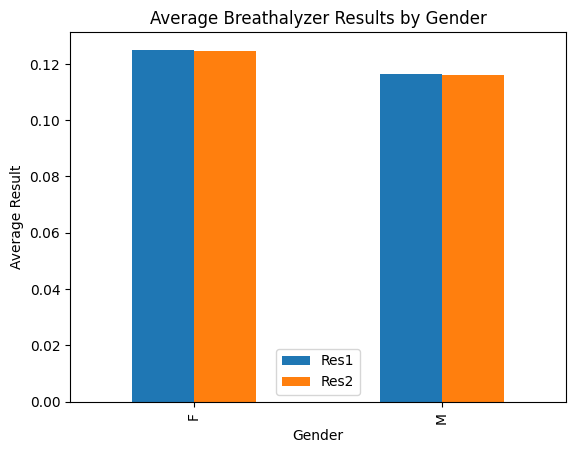

In [ ]:
# Count the number of tests by gender
display(ba_data['gender'].value_counts())

# Calculate the average of Res1 and Res2, grouped by gender
display(ba_data.groupby('gender')[['Res1', 'Res2']].mean())
plt.figure(figsize=(8, 5))
ba_data.groupby('gender')[['Res1', 'Res2']].mean().plot(kind='bar')
plt.title('Average Breathalyzer Results by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Result')

## 6. Above the legal limit
<p>In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for <a href="https://www.dmv.org/automotive-law/dui.php">all 50 states</a>. Assuming everyone tested in our data was driving (though we have no way of knowing this from the data), if either of the results (<code>Res1</code>, <code>Res2</code>) are above 0.08, the person would be charged with DUI (driving under the influence). </p>

In [ ]:
# Create a new column 'legal_limit' that is True if either Res1 or Res2 is > 0.08
ba_data['legal_limit'] = (ba_data['Res1'] > 0.08) | (ba_data['Res2'] > 0.08)

# Count the number of tests above and below the legal limit
display(ba_data['legal_limit'].value_counts())

,count
legal_limit,
True,1159
False,397


Text(0, 0.5, 'Number of Tests')

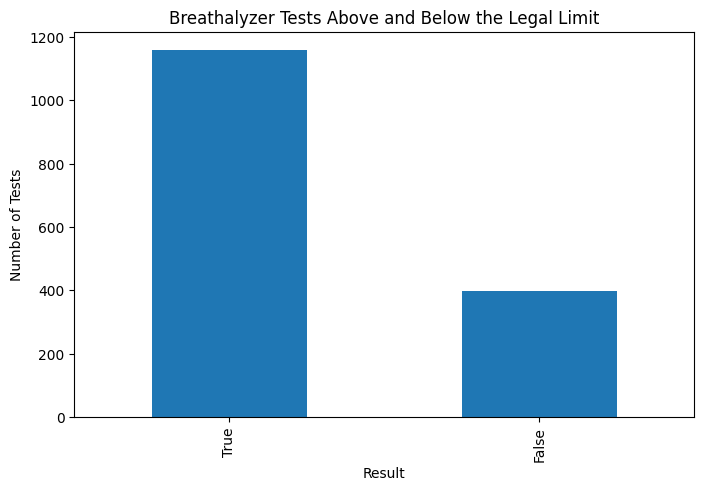

In [ ]:
plt.figure(figsize=(8, 5))
ba_data['legal_limit'].value_counts().plot(kind='bar')
plt.title('Breathalyzer Tests Above and Below the Legal Limit')
plt.xlabel('Result')
plt.ylabel('Number of Tests')

## 7. Breathalyzer tests: is there a pattern over time?
<p>We previously saw that 2am is the most common time of day for breathalyzer tests to be administered, and August is the most common month of the year for breathalyzer tests. Now, we look at the weeks in the year over time. </p>

In [ ]:
# Create a new column 'date' by combining the 'year', 'month', and 'day' columns
ba_data['date'] = pd.to_datetime(ba_data[['year', 'month', 'day']])

# Create a new column 'week' that contains the week of the year
ba_data['week'] = ba_data['date'].dt.isocalendar().week

# Count the number of tests by week
display(ba_data['week'].value_counts())

,count
week,
15,54
34,50
33,43
11,42
8,40
2,39
43,39
4,39
17,37


Text(0, 0.5, 'Number of Tests')

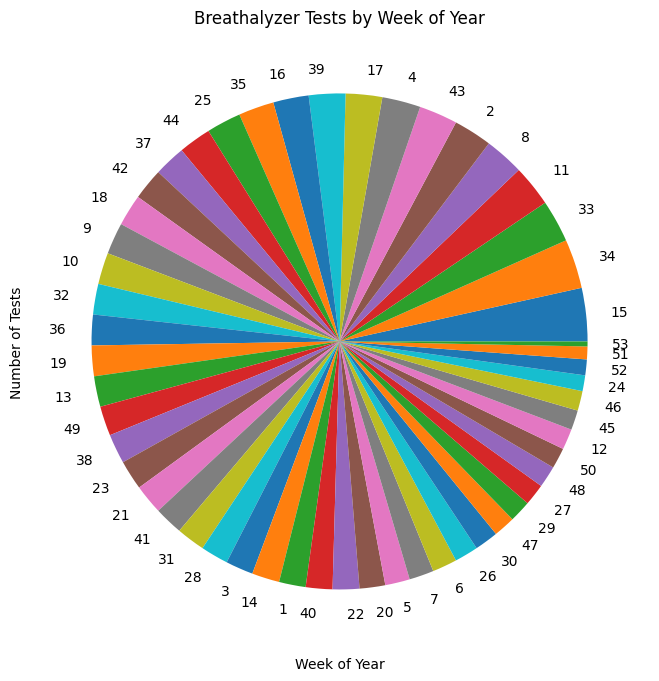

In [ ]:
plt.figure(figsize=(8, 20))
ba_data['week'].value_counts().plot(kind='pie')
plt.title('Breathalyzer Tests by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Number of Tests')

## 8. Looking at timelines
<p>How do the weeks differ over time? One of the most common data visualizations is the time series, a line tracking the changes in a variable over time. We will use the new <code>week</code> variable to look at test frequency over time. We end with a time series plot showing the frequency of breathalyzer tests by week in year, with one line for each year. </p>

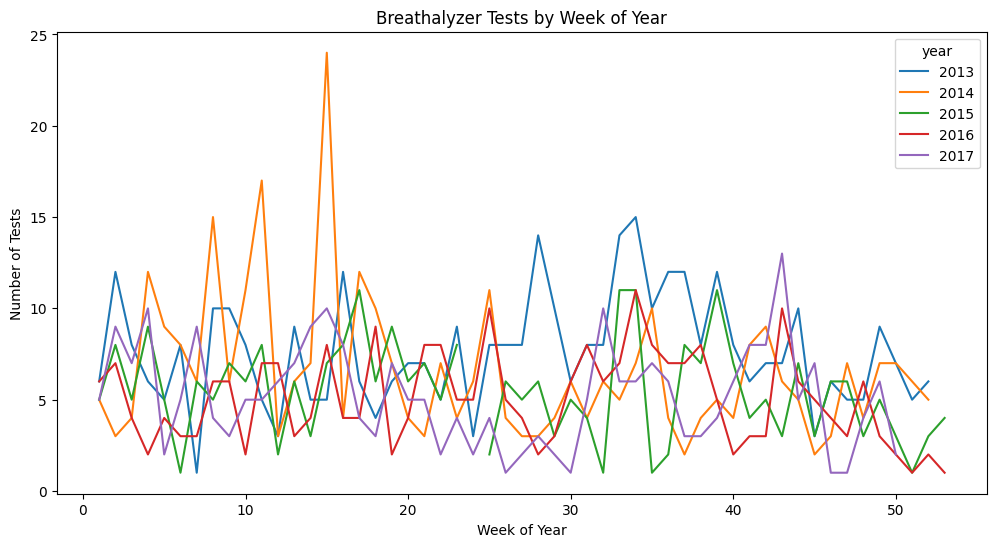

In [ ]:
import matplotlib.pyplot as plt

# Group by year and week, and count the number of tests
timeline = ba_data.groupby(['year', 'week']).count()['Res1']

# Unstack the timeline for plotting
timeline.unstack(level=0).plot(figsize=(12, 6))
plt.title('Breathalyzer Tests by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Number of Tests')
plt.show()

Text(0, 0.5, 'Number of Tests')

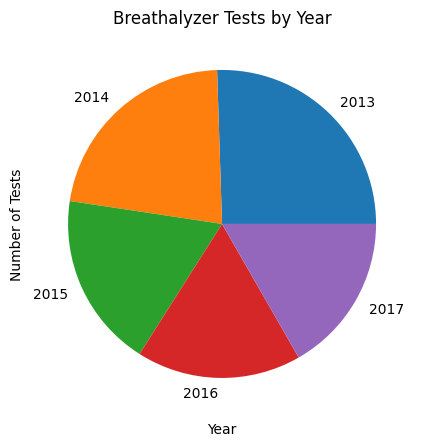

In [ ]:
plt.figure(figsize=(8, 5))
ba_data.groupby('year')['Res1'].count().plot(kind='pie')
plt.title('Breathalyzer Tests by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tests')

## 9. The end of VEISHEA
<p>From <a href="https://en.wikipedia.org/wiki/VEISHEA">Wikipedia</a>:
"VEISHEA was an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa. The celebration featured an annual parade and many open-house demonstrations of the university facilities and departments. Campus organizations exhibited products, technologies, and held fundraisers for various charity groups. In addition, VEISHEA brought speakers, lecturers, and entertainers to Iowa State. [...] VEISHEA was the largest student-run festival in the nation, bringing in tens of thousands of visitors to the campus each year."</p>
<p>This over 90-year tradition in Ames was <a href="https://www.news.iastate.edu/news/2014/08/07/veisheaend">terminated permanently</a> after <a href="https://www.desmoinesregister.com/story/news/crime-and-courts/2014/04/09/veishea-ames-car-tipping/7495935/">riots in 2014</a>, where drunk celebrators flipped over multiple vehicles and tore light poles down. This was not the first incidence of violence and severe property damage in VEISHEA's history. Did former President Leath make the right decision by canceling VEISHEA?</p>

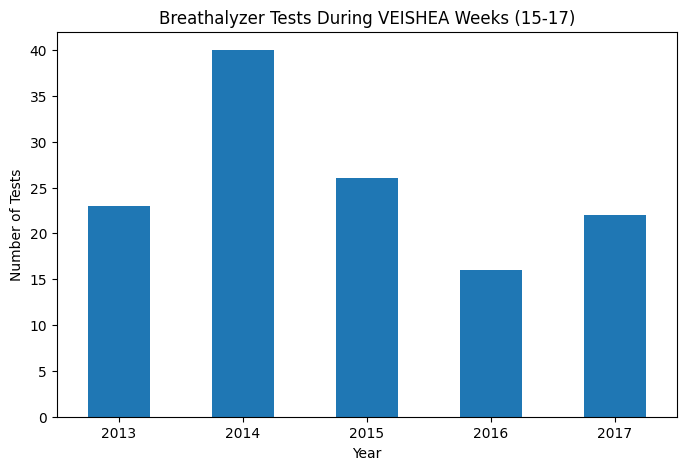

In [ ]:
# Filter the data to the weeks VEISHEA was held
veishea_weeks = ba_data[ba_data['week'].isin([15, 16, 17])]

# Group by year and count the number of tests
veishea_counts = veishea_weeks.groupby('year')['Res1'].count()

# Plot the results
plt.figure(figsize=(8, 5))
veishea_counts.plot(kind='bar')
plt.title('Breathalyzer Tests During VEISHEA Weeks (15-17)')
plt.xlabel('Year')
plt.ylabel('Number of Tests')
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Number of Tests')

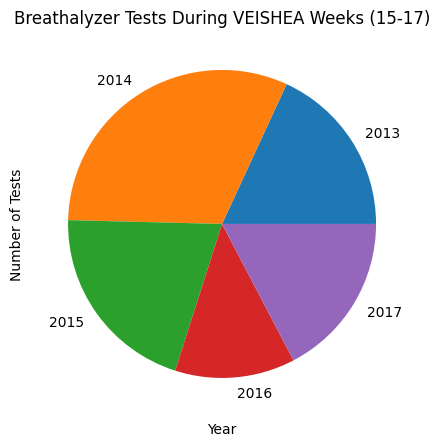

In [ ]:
plt.figure(figsize=(8, 5))
veishea_counts.plot(kind='pie')
plt.title('Breathalyzer Tests During VEISHEA Weeks (15-17)')
plt.xlabel('Year')
plt.ylabel('Number of Tests')